In [1]:
##################### Python 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'AppleGothic'
import numpy as np
import os
import datetime
import dcor
import math
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)
import warnings
from scipy import stats
from PIL import Image
warnings.filterwarnings('ignore')
from scipy.stats import chi2
import os
os.chdir('/Users/sss/Desktop/Data')
os.getcwd()
from IPython.core.display import display, HTML
#display(HTML("<style>.container { width: 60% !important; }</style>"))
plt.rcParams['font.family'] = 'AppleGothic'
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import pickle


In [3]:
df = pd.read_csv("city_day.csv")

In [6]:
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [10]:
df.shape

(29531, 16)

In [9]:
df.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [54]:
df.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [42]:
df_cleaned = df[['City', 'Date', 'PM2.5', 'NO', 'NO2', 'NOx', 'CO', 'SO2',
       'O3', 'Benzene',  'AQI']]

In [43]:
df_cleaned = df_cleaned.dropna()

In [44]:
df_cleaned.head()

,City,Date,PM2.5,NO,NO2,NOx,CO,SO2,O3,Benzene,AQI
28,Ahmedabad,2015-01-29,83.13,6.93,28.71,33.72,6.93,49.52,59.76,0.02,209.0
29,Ahmedabad,2015-01-30,79.84,13.85,28.68,41.08,13.85,48.49,97.07,0.04,328.0
30,Ahmedabad,2015-01-31,94.52,24.39,32.66,52.61,24.39,67.39,111.33,0.24,514.0
31,Ahmedabad,2015-02-01,135.99,43.48,42.08,84.57,43.48,75.23,102.70,0.40,782.0
32,Ahmedabad,2015-02-02,178.33,54.56,35.31,72.80,54.56,55.04,107.38,0.46,914.0


In [56]:
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'])
df_cleaned

,City,Date,PM2.5,NO,NO2,NOx,CO,SO2,O3,Benzene,AQI
28,Ahmedabad,2015-01-29,83.13,6.93,28.71,33.72,6.93,49.52,59.76,0.02,209.0
29,Ahmedabad,2015-01-30,79.84,13.85,28.68,41.08,13.85,48.49,97.07,0.04,328.0
30,Ahmedabad,2015-01-31,94.52,24.39,32.66,52.61,24.39,67.39,111.33,0.24,514.0
31,Ahmedabad,2015-02-01,135.99,43.48,42.08,84.57,43.48,75.23,102.70,0.40,782.0
32,Ahmedabad,2015-02-02,178.33,54.56,35.31,72.80,54.56,55.04,107.38,0.46,914.0
...,...,...,...,...,...,...,...,...,...,...,...
29525,Visakhapatnam,2020-06-26,7.63,5.91,23.27,17.19,0.46,6.87,19.90,1.45,47.0
29526,Visakhapatnam,2020-06-27,15.02,7.68,25.06,19.54,0.47,8.55,23.30,2.24,41.0
29527,Visakhapatnam,2020-06-28,24.38,3.42,26.06,16.53,0.52,12.72,30.14,0.74,70.0
29528,Visakhapatnam,2020-06-29,22.91,3.45,29.53,18.33,0.48,8.42,30.96,0.01,68.0


In [50]:
df_cleaned.columns

Index(['City', 'Date', 'PM2.5', 'NO', 'NO2', 'NOx', 'CO', 'SO2', 'O3',
       'Benzene', 'AQI'],
      dtype='object')

In [49]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19313 entries, 28 to 29529
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   City     19313 non-null  object        
 1   Date     19313 non-null  datetime64[ns]
 2   PM2.5    19313 non-null  float64       
 3   NO       19313 non-null  float64       
 4   NO2      19313 non-null  float64       
 5   NOx      19313 non-null  float64       
 6   CO       19313 non-null  float64       
 7   SO2      19313 non-null  float64       
 8   O3       19313 non-null  float64       
 9   Benzene  19313 non-null  float64       
 10  AQI      19313 non-null  float64       
dtypes: datetime64[ns](1), float64(9), object(1)
memory usage: 1.8+ MB


In [76]:
df_check = pd.DataFrame(df_cleaned.groupby(['Date', 'City']).mean()).reset_index()
df_check

,Date,City,PM2.5,NO,NO2,NOx,CO,SO2,O3,Benzene,AQI
0,2015-01-01,Delhi,313.22,69.16,36.39,110.59,15.20,9.25,41.68,14.36,472.0
1,2015-01-02,Delhi,186.18,62.09,32.87,88.14,9.54,6.65,29.97,10.55,454.0
2,2015-01-03,Delhi,87.18,25.73,30.31,47.95,10.61,2.65,19.71,3.91,143.0
3,2015-01-04,Delhi,151.84,25.01,36.91,48.62,11.54,4.63,25.36,4.26,319.0
4,2015-01-05,Delhi,146.60,14.01,34.92,38.25,9.20,3.33,23.20,2.80,325.0
...,...,...,...,...,...,...,...,...,...,...,...
19308,2020-07-01,Lucknow,34.97,8.50,14.44,6.73,0.73,6.02,36.07,7.79,76.0
19309,2020-07-01,Mumbai,3.84,27.64,5.57,33.21,0.37,13.18,6.68,0.78,53.0
19310,2020-07-01,Patna,35.42,44.50,31.15,57.72,0.82,3.99,25.76,1.73,98.0
19311,2020-07-01,Shillong,16.70,0.97,2.70,1.04,0.10,4.29,17.71,0.00,24.0


In [69]:
df_check.groupby(['City'])['PM2.5'].mean().sort_values(ascending=False)

City
Patna            122.810471
Delhi            121.509889
Lucknow          104.891600
Gurugram         104.462716
Ahmedabad         70.026754
Kolkata           65.001151
Brajrajnagar      63.471692
Guwahati          62.027520
Talcher           61.250385
Amritsar          56.419922
Jaipur            55.887123
Chennai           49.217834
Visakhapatnam     47.551368
Hyderabad         46.670256
Chandigarh        40.557102
Amaravati         39.422323
Bengaluru         35.793372
Mumbai            35.511968
Coimbatore        31.307143
Shillong          24.910657
Aizawl            20.108539
Name: PM2.5, dtype: float64

In [77]:
df_check

,Date,City,PM2.5,NO,NO2,NOx,CO,SO2,O3,Benzene,AQI
0,2015-01-01,Delhi,313.22,69.16,36.39,110.59,15.20,9.25,41.68,14.36,472.0
1,2015-01-02,Delhi,186.18,62.09,32.87,88.14,9.54,6.65,29.97,10.55,454.0
2,2015-01-03,Delhi,87.18,25.73,30.31,47.95,10.61,2.65,19.71,3.91,143.0
3,2015-01-04,Delhi,151.84,25.01,36.91,48.62,11.54,4.63,25.36,4.26,319.0
4,2015-01-05,Delhi,146.60,14.01,34.92,38.25,9.20,3.33,23.20,2.80,325.0
...,...,...,...,...,...,...,...,...,...,...,...
19308,2020-07-01,Lucknow,34.97,8.50,14.44,6.73,0.73,6.02,36.07,7.79,76.0
19309,2020-07-01,Mumbai,3.84,27.64,5.57,33.21,0.37,13.18,6.68,0.78,53.0
19310,2020-07-01,Patna,35.42,44.50,31.15,57.72,0.82,3.99,25.76,1.73,98.0
19311,2020-07-01,Shillong,16.70,0.97,2.70,1.04,0.10,4.29,17.71,0.00,24.0


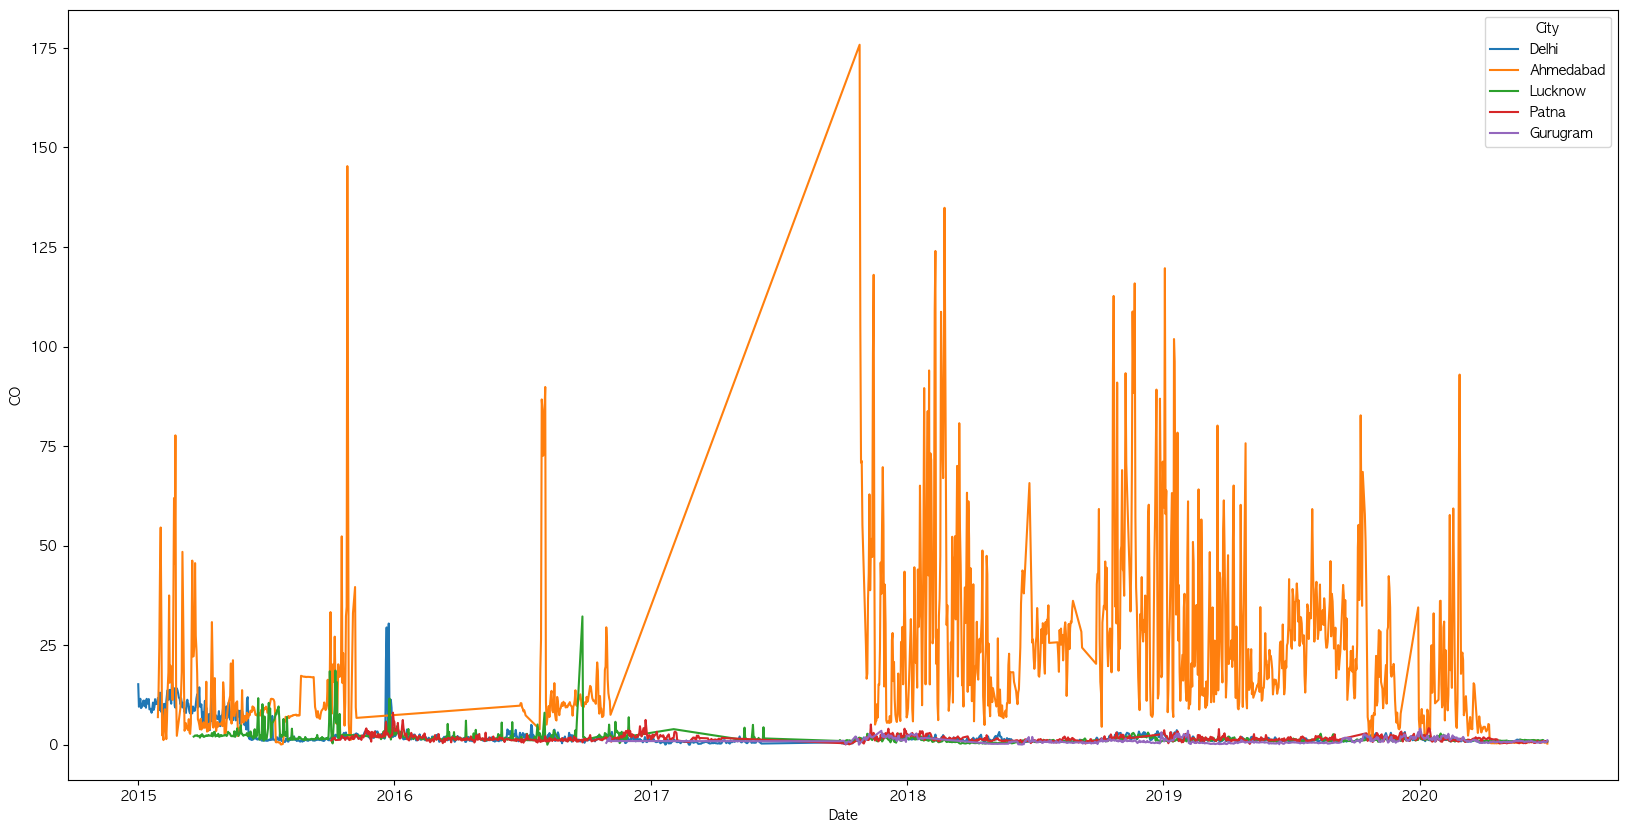

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

cities = ['Patna', 'Delhi', 'Lucknow', 'Gurugram', 'Ahmedabad']
df_filtered = df_check[df_check['City'].isin(cities)]

sns.lineplot(data=df_filtered, x='Date', y='CO', hue='City')
plt.gcf().set_size_inches(20, 10)
plt.show()


In [84]:
df_all = df_cleaned.groupby('Date')[[ 'PM2.5', 'NO', 'NO2', 'NOx', 'CO', 'SO2', 'O3',
       'Benzene', 'AQI']].mean()

In [86]:
df_all

,PM2.5,NO,NO2,NOx,CO,SO2,O3,Benzene,AQI
Date,,,,,,,,,
2015-01-01,313.220000,69.160000,36.390000,110.590000,15.200000,9.250000,41.680000,14.360000,472.000000
2015-01-02,186.180000,62.090000,32.870000,88.140000,9.540000,6.650000,29.970000,10.550000,454.000000
2015-01-03,87.180000,25.730000,30.310000,47.950000,10.610000,2.650000,19.710000,3.910000,143.000000
2015-01-04,151.840000,25.010000,36.910000,48.620000,11.540000,4.630000,25.360000,4.260000,319.000000
2015-01-05,146.600000,14.010000,34.920000,38.250000,9.200000,3.330000,23.200000,2.800000,325.000000
...,...,...,...,...,...,...,...,...,...
2020-06-27,26.911111,8.055556,16.795000,16.292778,0.612222,8.842222,31.932778,1.502222,69.666667
2020-06-28,28.040588,8.895882,14.091176,16.242353,0.553529,8.468235,30.142353,1.575294,79.176471
2020-06-29,25.163889,10.601667,15.620556,18.239444,0.634444,9.521667,30.328889,1.839444,78.666667


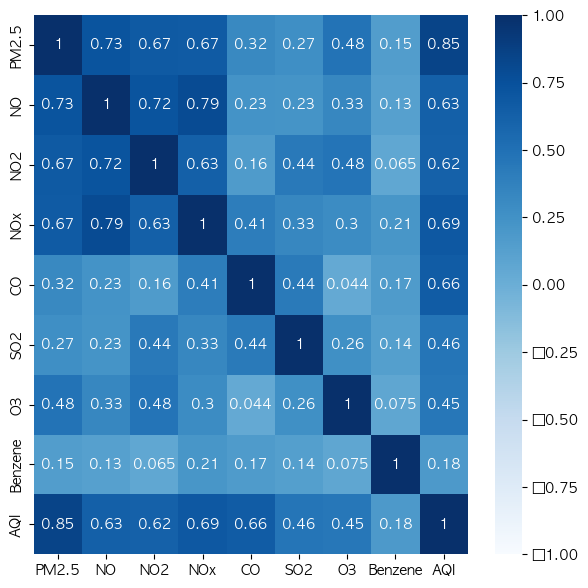

In [96]:
sns.heatmap(df_all.corr(), annot =True, vmax=1, vmin=-1, cmap='Blues')

plt.gcf().set_size_inches(7,7)

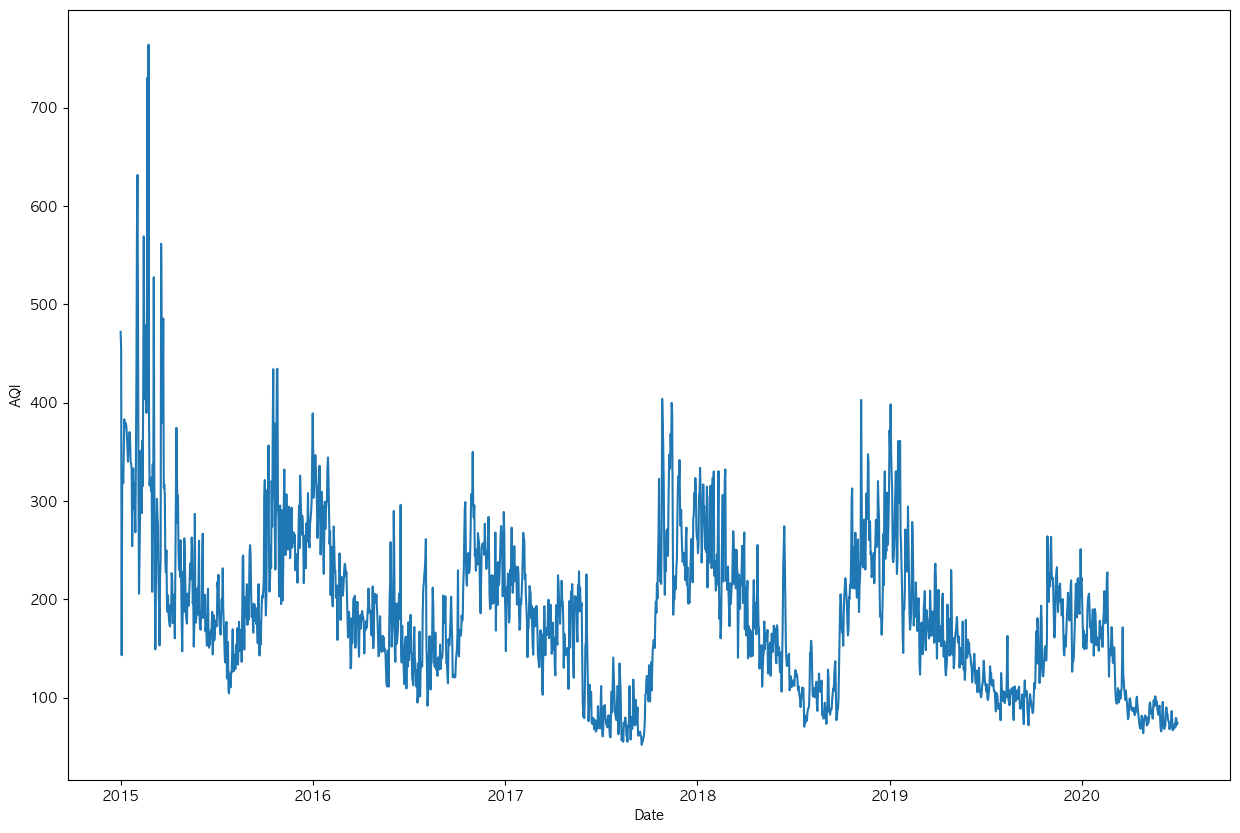

In [88]:
sns.lineplot(data=df_all, x=df_all.index, y='AQI')
plt.gcf().set_size_inchesa(15,10)

In [99]:
df_all.to_csv('df_all.csv')

In [7]:
df['City'].value_counts()

City
Ahmedabad             2009
Delhi                 2009
Mumbai                2009
Bengaluru             2009
Lucknow               2009
Chennai               2009
Hyderabad             2006
Patna                 1858
Gurugram              1679
Visakhapatnam         1462
Amritsar              1221
Jorapokhar            1169
Jaipur                1114
Thiruvananthapuram    1112
Amaravati              951
Brajrajnagar           938
Talcher                925
Kolkata                814
Guwahati               502
Coimbatore             386
Shillong               310
Chandigarh             304
Bhopal                 289
Ernakulam              162
Kochi                  162
Aizawl                 113
Name: count, dtype: int64

In [16]:
df['AQI_Bucket'].value_counts()

AQI_Bucket
Moderate        8829
Satisfactory    8224
Poor            2781
Very Poor       2337
Good            1341
Severe          1338
Name: count, dtype: int64

In [17]:
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB
